<a href="https://colab.research.google.com/github/heesoo-jang/comp664-deep-learning-spring-2023/blob/main/Copy_of_COMP664_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

# 2. Implementing the logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

In [11]:
# binary logistic loss function in numpy
import numpy as np
import matplotlib.pyplot as plt

def logistic_loss(y, o):
    return np.log(1 + np.exp(-y * o))

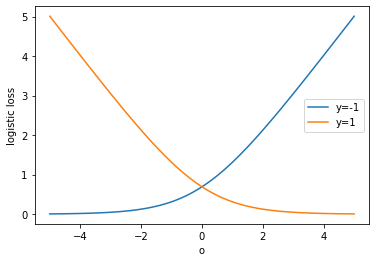

In [12]:
# a plot of the logistic loss for y in {-1, 1} over the range of o in [-5, 5]

o = np.linspace(-5, 5, 100)
y = [-1, 1]

for y_val in y:
    plt.plot(o, logistic_loss(y_val, o), label=f'y={y_val}')
plt.xlabel('o')
plt.ylabel('logistic loss')
plt.legend()
plt.show()

In [13]:
# The derivative of logistic loss with respect to o is given by ∂/∂𝑜𝑙(𝑦,𝑜)= −𝑦*(1/(1+exp(−𝑦⋅𝑜)))

def derivative_loss(y,o):
    return -y*(1/(1+np.exp(-y*o)))

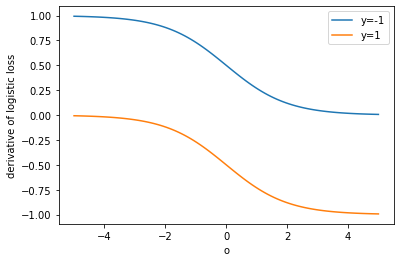

In [14]:
# plot

for y_val in y:
    plt.plot(o, derivative_loss(y_val, o), label=f'y={y_val}')
plt.xlabel('o')
plt.ylabel('derivative of logistic loss')
plt.legend()
plt.show()

<ipython-input-11-be0106b7514a>:6: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * o))


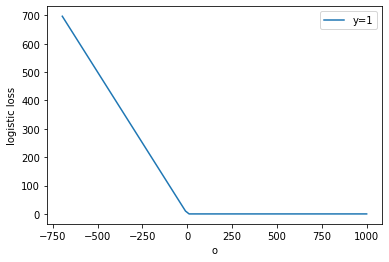

In [15]:
# Finally, in a new plot, plotting 𝑙(𝑦,𝑜) with 𝑦=1 and 𝑜∈[−1000,1000] . 
# As 𝑜 approaches positive infinity, the logistic loss asymptotes to zero, and as 𝑜 approaches negative infinity, the logistic loss approaches infinity

o = np.linspace(-1000, 1000, 100)
y = 1
plt.plot(o, logistic_loss(y, o), label=f'y={y}')
plt.xlabel('o')
plt.ylabel('logistic loss')
plt.legend()
plt.show()

This happens because as 𝑜 becomes large and positive, the value of exp(−𝑦⋅𝑜) becomes very small and so the value of log(1+exp(−𝑦⋅𝑜)) becomes closer and closer to log(1) which is zero. On the other hand, as 𝑜 becomes large and negative, the value of exp(−𝑦⋅𝑜) becomes very large and so the value of log(1+exp(−𝑦⋅𝑜)) becomes larger and larger, and the the logistic loss asymptotes to infinity.

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [16]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

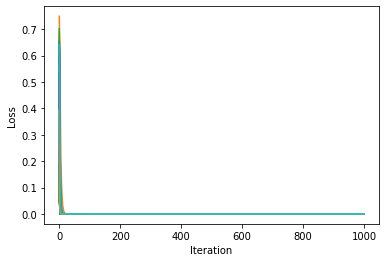

In [17]:

# Logistic loss function
def logistic_loss(y, o):
    return np.log(1 + np.exp(-y * o))

#derivative of logistic loss function
def derivative_loss(y,o):
    return -y*(1/(1+np.exp(-y*o)))

# Logistic regression model
class LogisticRegressionModel:
    def __init__(self):
        self.m = np.random.randn()
        self.b = np.random.randn()

    def predict(self, x):
        return self.m * x + self.b

    def loss(self, x, y):
        o = self.predict(x)
        return logistic_loss(y, o)
    
    def grad_m(self,x,y):
        o = self.predict(x)
        return derivative_loss(y,o)*x
    
    def grad_b(self,x,y):
        o = self.predict(x)
        return derivative_loss(y,o)

#initialize the model 
model = LogisticRegressionModel()

# Training loop
x,y = generate_data()
losses = []
learning_rate = 0.1
for i in range(1000):
    loss = model.loss(x, y)
    losses.append(loss)
    d_m = model.grad_m(x,y)
    d_b = model.grad_b(x,y)
    model.m = model.m - learning_rate * d_m.mean()
    model.b = model.b - learning_rate * d_b.mean()

# Plot the loss over the course of training
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

The model parameters are updated in the opposite direction of the gradient of the loss function at each iteration, which is the direction of steepest descent. By this way, the model parameters will converge to the minimum of the loss function which is the optimal solution for our problem.